## Exploring Protein Relationships Through ESM-2 Embeddings

Proteins are molecular machines with unique structures that determine their functions. ESM-2 treats protein sequences as a language, learning representations that capture evolutionary and functional relationships without relying on traditional sequence alignment.

In this notebook, we'll explore how ESM-2 embeddings reveal relationships between six human proteins:

**Oxygen Transport & Storage:**
- **Hemoglobin Beta**: The oxygen-carrying protein in red blood cells, part of the tetrameric hemoglobin complex
- **Myoglobin**: The oxygen storage protein in muscle tissue, structurally similar to individual hemoglobin subunits

**Antimicrobial Defense:**
- **Cathelicidin (LL-37)**: An antimicrobial peptide that disrupts bacterial membranes and modulates immune responses
- **Defensin Beta 4A**: A small cysteine-rich antimicrobial peptide that directly kills bacteria and other pathogens

**Structural Support:**
- **Erythroid Alpha-Spectrin**: Forms the flexible scaffolding that gives red blood cells their shape and helps them squeeze through tiny blood vessels
- **Dystrophin**: A massive protein that connects the muscle cell's internal framework to its surroundings, preventing damage during muscle contraction

### Setup

Here we import all neccessary libraries.

In [32]:
import mlx.core as mx
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import pandas as pd

These are our protein sequences, obtained from [UniProt](https://www.uniprot.org/).

In [33]:
proteins = [
    # Oxygen Transport & Storage
    ("Hemoglobin Beta", "MVHLTPEEKSAVTALWGKVNVDEVGGEALGRLLVVYPWTQRFFESFGDLSTPDAVMGNPKVKAHGKKVLGAFSDGLAHLDNLKGTFATLSELHCDKLHVDPENFRLLGNVLVCVLAHHFGKEFTPPVQAAYQKVVAGVANALAHKYH"),
    ("Myoglobin", "MGLSDGEWQLVLNVWGKVEADIPGHGQEVLIRLFKGHPETLEKFDKFKHLKSEDEMKASEDLKKHGATVLTALGGILKKKGHHEAEIKPLAQSHATKHKIPVKYLEFISECIIQVLQSKHPGDFGADAQGAMNKALELFRKDMASNYKELGFQG"),

    # Antimicrobial Defense
    ("Cathelicidin (LL-37)", "MKTQRDGHSLGRWSLVLLLLGLVMPLAIIAQVLSYKEAVLRAIDGINQRSSDANLYRLLDLDPRPTMDGDPDTPKPVSFTVKETVCPRTTQQSPEDCDFKKDGLVKRCMGTVTLNQARGSFDISCDKDNKRFALLGDFFRKSKEKIGKEFKRIVQRIKDFLRNLVPRTES"),
    ("Defensin Beta 4A", "MRVLYLLFSFLFIFLMPLPGVFGGIGDPVTCLKSGAICHPVFCPRRYKQIGTCGLPGTKCCKKP"),

    # Structural Support
    ("Erythroid Alpha-Spectrin", "MEQFPKETVVESSGPKVLETAEEIQERRQEVLTRYQSFKERVAERGQKLEDSYHLQVFKRDADDLGKWIMEKVNILTDKSYEDPTNIQGKYQKHQSLEAEVQTKSRLMSELEKTREERFTMGHSAHEETKAHIEELRHLWDLLLELTLEKGDQLLRALKFQQYVQECADILEWIGDKEAIATSVELGEDWERTEVLHKKFEDFQVELVAKEGRVVEVNQYANECAEENHPDLPLIQSKQNEVNAAWERLRGLALQRQKALSNAANLQRFKRDVTEAIQWIKEKEPVLTSEDYGKDLVASEGLFHSHKGLERNLAVMSDKVKELCAKAEKLTLSHPSDAPQIQEMKEDLVSSWEHIRALATSRYEKLQATYWYHRFSSDFDELSGWMNEKTAAINADELPTDVAGGEVLLDRHQQHKHEIDSYDDRFQSADETGQDLVNANHEASDEVREKMEILDNNWTALLELWDERHRQYEQCLDFHLFYRDSEQVDSWMSRQEAFLENEDLGNSLGSAEALLQKHEDFEEAFTAQEEKIITVDKTATKLIGDDHYDSENIKAIRDGLLARRDALREKAATRRRLLKESLLLQKLYEDSDDLKNWINKKKKLADDEDYKDIQNLKSRVQKQQVFEKELAVNKTQLENIQKTGQEMIEGGHYASDNVTTRLSEVASLWEELLEATKQKGTQLHEANQQLQFENNAEDLQRWLEDVEWQVTSEDYGKGLAEVQNRLRKHGLLESAVAARQDQVDILTDLAAYFEEIGHPDSKDIRARQESLVCRFEALKEPLATRKKKLLDLLHLQLICRDTEDEEAWIQETEPSATSTYLGKDLIASKKLLNRHRVILENIASHEPRIQEITERGNKMVEEGHFAAEDVASRVKSLNQNMESLRARAARRQNDLEANVQFQQYLADLHEAETWIREKEPIVDNTNYGADEEAAGALLKKHEAFLLDLNSFGDSMKALRNQANACQQQQAAPVEGVAGEQRVMALYDFQARSPREVTMKKGDVLTLLSSINKDWWKVEAADHQGIVPAVYVRRLAHDEFPMLPQRRREEPGNITQRQEQIENQYRSLLDRAEERRRRLLQRYNEFLLAYEAGDMLEWIQEKKAENTGVELDDVWELQKKFDEFQKDLNTNEPRLRDINKVADDLLFEGLLTPEGAQIRQELNSRWGSLQRLADEQRQLLGSAHAVEVFHREADDTKEQIEKKCQALSAADPGSDLFSVQALQRRHEGFERDLVPLGDKVTILGETAERLSESHPDATEDLQRQKMELNEAWEDLQGRTKDRKESLNEAQKFYLFLSKARDLQNWISSIGGMVSSQELAEDLTGIEILLERHQEHRADMEAEAPTFQALEDFSAELIDSGHHASPEIEKKLQAVKLERDDLEKAWEKRKKILDQCLELQMFQGNCDQVESWMVARENSLRSDDKSSLDSLEALMKKRDDLDKAITAQEGKITDLEHFAESLIADEHYAKEEIATRLQRVLDRWKALKAQLIDERTKLGDYANLKQFYRDLEELEEWISEMLPTACDESYKDATNIQRKYLKHQTFAHEVDGRSEQVHGVINLGNSLIECSACDGNEEAMKEQLEQLKEHWDHLLERTNDKGKKLNEASRQQRFNTSIRDFEFWLSEAETLLAMKDQARDLASAGNLLKKHQLLEREMLAREDALKDLNTLAEDLLSSGTFNVDQIVKKKDNVNKRFLNVQELAAAHHEKLKEAYALFQFFQDLDDEESWIEEKLIRVSSQDYGRDLQGVQNLLKKHKRLEGELVAHEPAIQNVLDMAEKLKDKAAVGQEEIQLRLAQFVEHWEKLKELAKARGLKLEESLEYLQFMQNAEEEEAWINEKNALAVRGDCGDTLAATQSLLMKHEALENDFAVHETRVQNVCAQGEDILNKVLQEESQNKEISSKIEALNEKTPSLAKAIAAWKLQLEDDYAFQEFNWKADVVEAWIADKETSLKTNGNGADLGDFLTLLAKQDTLDASLQSFQQERLPEITDLKDKLISAQHNQSKAIEERYAALLKRWEQLLEASAVHRQKLLEKQLPLQKAEDLFVEFAHKASALNNWCEKMEENLSEPVHCVSLNEIRQLQKDHEDFLASLARAQADFKCLLELDQQIKALGVPSSPYTWLTVEVLERTWKHLSDIIEEREQELQKEEARQVKNFEMCQEFEQNASTFLQWILETRAYFLDGSLLKETGTLESQLEANKRKQKEIQAMKRQLTKIVDLGDNLEDALILDIKYSTIGLAQQWDQLYQLGLRMQHNLEQQIQAKDIKGVSEETLKEFSTIYKHFDENLTGRLTHKEFRSCLRGLNYYLPMVEEDEHEPKFEKFLDAVDPGRKGYVSLEDYTAFLIDKESENIKSSDEIENAFQALAEGKSYITKEDMKQALTPEQVSFCATHMQQYMDPRGRSHLSGYDYVGFTNSYFGN"),
    ("Dystrophin", "MLWWEEVEDCYEREDVQKKTFTKWVNAQFSKFGKQHIENLFSDLQDGRRLLDLLEGLTGQKLPKEKGSTRVHALNNVNKALRVLQNNNVDLVNIGSTDIVDGNHKLTLGLIWNIILHWQVKNVMKNIMAGLQQTNSEKILLSWVRQSTRNYPQVNVINFTTSWSDGLALNALIHSHRPDLFDWNSVVCQQSATQRLEHAFNIARYQLGIEKLLDPEDVDTTYPDKKSILMYITSLFQVLPQQVSIEAIQEVEMLPRPPKVTKEEHFQLHHQMHYSQQITVSLAQGYERTSSPKPRFKSYAYTQAAYVTTSDPTRSPFPSQHLEAPEDKSFGSSLMESEVNLDRYQTALEEVLSWLLSAEDTLQAQGEISNDVEVVKDQFHTHEGYMMDLTAHQGRVGNILQLGSKLIGTGKLSEDEETEVQEQMNLLNSRWECLRVASMEKQSNLHRVLMDLQNQKLKELNDWLTKTEERTRKMEEEPLGPDLEDLKRQVQQHKVLQEDLEQEQVRVNSLTHMVVVVDESSGDHATAALEEQLKVLGDRWANICRWTEDRWVLLQDILLKWQRLTEEQCLFSAWLSEKEDAVNKIHTTGFKDQNEMLSSLQKLAVLKADLEKKKQSMGKLYSLKQDLLSTLKNKSVTQKTEAWLDNFARCWDNLVQKLEKSTAQISQAVTTTQPSLTQTTVMETVTTVTTREQILVKHAQEELPPPPPQKKRQITVDSEIRKRLDVDITELHSWITRSEAVLQSPEFAIFRKEGNFSDLKEKVNAIEREKAEKFRKLQDASRSAQALVEQMVNEGVNADSIKQASEQLNSRWIEFCQLLSERLNWLEYQNNIIAFYNQLQQLEQMTTTAENWLKIQPTTPSEPTAIKSQLKICKDEVNRLSDLQPQIERLKIQSIALKEKGQGPMFLDADFVAFTNHFKQVFSDVQAREKELQTIFDTLPPMRYQETMSAIRTWVQQSETKLSIPQLSVTDYEIMEQRLGELQALQSSLQEQQSGLYYLSTTVKEMSKKAPSEISRKYQSEFEEIEGRWKKLSSQLVEHCQKLEEQMNKLRKIQNHIQTLKKWMAEVDVFLKEEWPALGDSEILKKQLKQCRLLVSDIQTIQPSLNSVNEGGQKIKNEAEPEFASRLETELKELNTQWDHMCQQVYARKEALKGGLEKTVSLQKDLSEMHEWMTQAEEEYLERDFEYKTPDELQKAVEEMKRAKEEAQQKEAKVKLLTESVNSVIAQAPPVAQEALKKELETLTTNYQWLCTRLNGKCKTLEEVWACWHELLSYLEKANKWLNEVEFKLKTTENIPGGAEEISEVLDSLENLMRHSEDNPNQIRILAQTLTDGGVMDELINEELETFNSRWRELHEEAVRRQKLLEQSIQSAQETEKSLHLIQESLTFIDKQLAAYIADKVDAAQMPQEAQKIQSDLTSHEISLEEMKKHNQGKEAAQRVLSQIDVAQKKLQDVSMKFRLFQKPANFEQRLQESKMILDEVKMHLPALETKSVEQEVVQSQLNHCVNLYKSLSEVKSEVEMVIKTGRQIVQKKQTENPKELDERVTALKLHYNELGAKVTERKQQLEKCLKLSRKMRKEMNVLTEWLAATDMELTKRSAVEGMPSNLDSEVAWGKATQKEIEKQKVHLKSITEVGEALKTVLGKKETLVEDKLSLLNSNWIAVTSRAEEWLNLLLEYQKHMETFDQNVDHITKWIIQADTLLDESEKKKPQQKEDVLKRLKAELNDIRPKVDSTRDQAANLMANRGDHCRKLVEPQISELNHRFAAISHRIKTGKASIPLKELEQFNSDIQKLLEPLEAEIQQGVNLKEEDFNKDMNEDNEGTVKELLQRGDNLQQRITDERKREEIKIKQQLLQTKHNALKDLRSQRRKKALEISHQWYQYKRQADDLLKCLDDIEKKLASLPEPRDERKIKEIDRELQKKKEELNAVRRQAEGLSEDGAAMAVEPTQIQLSKRWREIESKFAQFRRLNFAQIHTVREETMMVMTEDMPLEISYVPSTYLTEITHVSQALLEVEQLLNAPDLCAKDFEDLFKQEESLKNIKDSLQQSSGRIDIIHSKKTAALQSATPVERVKLQEALSQLDFQWEKVNKMYKDRQGRFDRSVEKWRRFHYDIKIFNQWLTEAEQFLRKTQIPENWEHAKYKWYLKELQDGIGQRQTVVRTLNATGEEIIQQSSKTDASILQEKLGSLNLRWQEVCKQLSDRKKRLEEQKNILSEFQRDLNEFVLWLEEADNIASIPLEPGKEQQLKEKLEQVKLLVEELPLRQGILKQLNETGGPVLVSAPISPEEQDKLENKLKQTNLQWIKVSRALPEKQGEIEAQIKDLGQLEKKLEDLEEQLNHLLLWLSPIRNQLEIYNQPNQEGPFDVKETEIAVQAKQPDVEEILSKGQHLYKEKPATQPVKRKLEDLSSEWKAVNRLLQELRAKQPDLAPGLTTIGASPTQTVTLVTQPVVTKETAISKLEMPSSLMLEVPALADFNRAWTELTDWLSLLDQVIKSQRVMVGDLEDINEMIIKQKATMQDLEQRRPQLEELITAAQNLKNKTSNQEARTIITDRIERIQNQWDEVQEHLQNRRQQLNEMLKDSTQWLEAKEEAEQVLGQARAKLESWKEGPYTVDAIQKKITETKQLAKDLRQWQTNVDVANDLALKLLRDYSADDTRKVHMITENINASWRSIHKRVSEREAALEETHRLLQQFPLDLEKFLAWLTEAETTANVLQDATRKERLLEDSKGVKELMKQWQDLQGEIEAHTDVYHNLDENSQKILRSLEGSDDAVLLQRRLDNMNFKWSELRKKSLNIRSHLEASSDQWKRLHLSLQELLVWLQLKDDELSRQAPIGGDFPAVQKQNDVHRAFKRELKTKEPVIMSTLETVRIFLTEQPLEGLEKLYQEPRELPPEERAQNVTRLLRKQAEEVNTEWEKLNLHSADWQRKIDETLERLRELQEATDELDLKLRQAEVIKGSWQPVGDLLIDSLQDHLEKVKALRGEIAPLKENVSHVNDLARQLTTLGIQLSPYNLSTLEDLNTRWKLLQVAVEDRVRQLHEAHRDFGPASQHFLSTSVQGPWERAISPNKVPYYINHETQTTCWDHPKMTELYQSLADLNNVRFSAYRTAMKLRRLQKALCLDLLSLSAACDALDQHNLKQNDQPMDILQIINCLTTIYDRLEQEHNNLVNVPLCVDMCLNWLLNVYDTGRTGRIRVLSFKTGIISLCKAHLEDKYRYLFKQVASSTGFCDQRRLGLLLHDSIQIPRQLGEVASFGGSNIEPSVRSCFQFANNKPEIEAALFLDWMRLEPQSMVWLPVLHRVAAAETAKHQAKCNICKECPIIGFRYRSLKHFNYDICQSCFFSGRVAKGHKMHYPMVEYCTPTTSGEDVRDFAKVLKNKFRTKRYFAKHPRMGYLPVQTVLEGDNMETPVTLINFWPVDSAPASSPQLSHDDTHSRIEHYASRLAEMENSNGSYLNDSISPNESIDDEHLLIQHYCQSLNQDSPLSQPRSPAQILISLESEERGELERILADLEEENRNLQAEYDRLKQQHEHKGLSPLPSPPEMMPTSPQSPRDAELIAEAKLLRQHKGRLEARMQILEDHNKQLESQLHRLRQLLEQPQAEAKVNGTTVSSPSTSLQRSDSSQPMLLRVVGSQTSDSMGEEDLLSPPQDTSTGLEEVMEQLNNSFPSSRGRNTPGKPMREDTM"),
]

### Loading the model and tokenizing a sequence

Load the ESM-2 model. Here we will use the 650M parameter version. Change the path below to point to your converted checkpoint.



In [34]:
import sys
sys.path.append("..")

from esm import ESM2

esm_checkpoint = "../checkpoints/mlx-esm2_t33_650M_UR50D"
tokenizer, model = ESM2.from_pretrained(esm_checkpoint)

Here, we tokenize and decode the protein sequence for human Insulin.

In [35]:
human_insulin_sequence = "MALWMRLLPLLALLALWGPDPAAAFVNQHLCGSHLVEALYLVCGERGFFYTPKTRREAEDLQVGQVELGGGPGAGSLQPLALEGSLQKRGIVEQCCTSICSLYQLENYCN"
tokens = tokenizer.encode(human_insulin_sequence, add_special_tokens=False)
print(f"Sequence: {human_insulin_sequence}")
print(f"Tokens: {tokens.tolist()}")
print(f"Decoded: {tokenizer.decode(tokens)}")

Sequence: MALWMRLLPLLALLALWGPDPAAAFVNQHLCGSHLVEALYLVCGERGFFYTPKTRREAEDLQVGQVELGGGPGAGSLQPLALEGSLQKRGIVEQCCTSICSLYQLENYCN
Tokens: [20, 5, 4, 22, 20, 10, 4, 4, 14, 4, 4, 5, 4, 4, 5, 4, 22, 6, 14, 13, 14, 5, 5, 5, 18, 7, 17, 16, 21, 4, 23, 6, 8, 21, 4, 7, 9, 5, 4, 19, 4, 7, 23, 6, 9, 10, 6, 18, 18, 19, 11, 14, 15, 11, 10, 10, 9, 5, 9, 13, 4, 16, 7, 6, 16, 7, 9, 4, 6, 6, 6, 14, 6, 5, 6, 8, 4, 16, 14, 4, 5, 4, 9, 6, 8, 4, 16, 15, 10, 6, 12, 7, 9, 16, 23, 23, 11, 8, 12, 23, 8, 4, 19, 16, 4, 9, 17, 19, 23, 17]
Decoded: MALWMRLLPLLALLALWGPDPAAAFVNQHLCGSHLVEALYLVCGERGFFYTPKTRREAEDLQVGQVELGGGPGAGSLQPLALEGSLQKRGIVEQCCTSICSLYQLENYCN


### Embedding sequences

To compute the embeddings of our proteins, we pass each protein sequence through ESM-2's tokenizer to convert amino acids into token IDs, then extract the final layer representations using `get_sequence_representations()`. This process gives us a vector for each protein that captures its learned functional and evolutionary features.

In [36]:
def extract_embeddings_batch(model, protein_list):
    """Extract embeddings by processing all sequences in a batch."""
    sequences = [seq for _, seq in protein_list]
    names = [name for name, _ in protein_list]
    
    tokens = model.tokenizer.batch_encode(sequences, add_special_tokens=True)
    embeddings = model.get_sequence_representations(tokens, layer=-1)
    
    return embeddings, names

In [37]:
embeddings, protein_names = extract_embeddings_batch(model, proteins)
print(f"\nEmbedding shape: {embeddings.shape}")
print(f"Each protein represented by {embeddings.shape[1]} features")


Embedding shape: (6, 1280)
Each protein represented by 1280 features


### Protein embedding similarity matrix

We can measure how similar the protein embeddings are by calculating a similarity matrix. We normalize each embedding to unit length and compute cosine similarities between all pairs, producing a matrix where values close to 1 indicate highly similar proteins and values close to 0 indicate dissimilar ones.

In [38]:
def compute_similarity_matrix(embeddings):
    """Compute cosine similarity matrix for embeddings."""
    normalized = embeddings / mx.linalg.norm(embeddings, axis=1, keepdims=True)
    similarity_matrix = normalized @ normalized.T
    return similarity_matrix

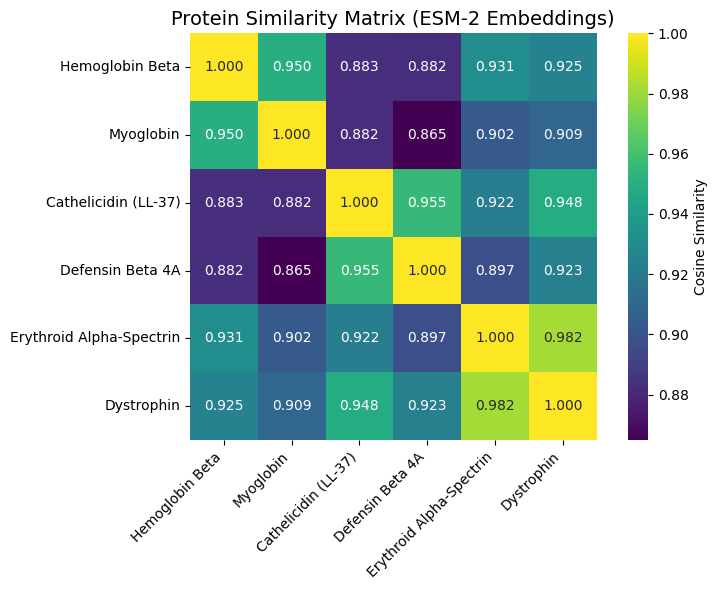

In [39]:
similarity_matrix = compute_similarity_matrix(embeddings)

plt.figure(figsize=(8, 6))
similarity_np = np.array(similarity_matrix)

sim_df = pd.DataFrame(similarity_np, 
                     index=protein_names, 
                     columns=protein_names)

sns.heatmap(sim_df, annot=True, cmap='viridis', 
           fmt='.3f', square=True, cbar_kws={'label': 'Cosine Similarity'})
plt.title('Protein Similarity Matrix (ESM-2 Embeddings)', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

The similarity matrix highlights clear expected relationships. Erythroid Alpha-Spectrin and Dystrophin are most similar (0.982), reflecting their shared role in cytoskeletal support. Hemoglobin Beta and Myoglobin also show high similarity (0.950), consistent with their oxygen-binding functions. Antimicrobial peptides Cathelicidin and Defensin Beta 4A likewise cluster closely (0.955), reflecting their common role in immunity. Alongside these expected patterns, some unexpected similarities appear, such as between Cathelicidin and Dystrophin (0.948) or Hemoglobin Beta and Alpha-Spectrin (0.931). These likely reflect sequence-level motifs or general structural tendencies that the embeddings capture, rather than direct functional relationships.

### PCA visualization

PCA (Principal Component Analysis) reduces high-dimensional data to a lower-dimensional representation by finding the directions of maximum variance in the data. This allows us to visualize our high-dimensional protein embeddings in 2D space while preserving the most important patterns of similarity and difference between proteins.

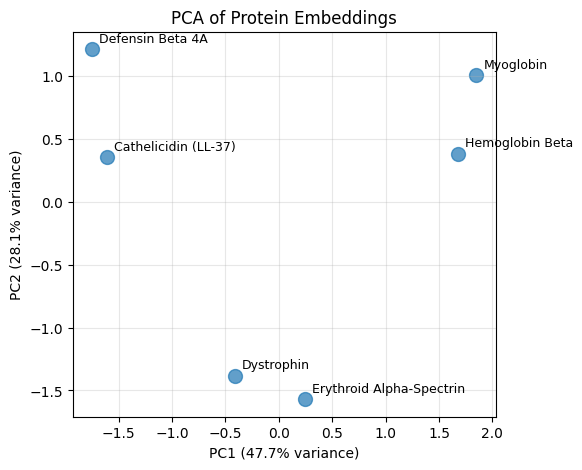

In [42]:
pca = PCA(n_components=2)
pca_result = pca.fit_transform(np.array(embeddings))

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(pca_result[:, 0], pca_result[:, 1], s=100, alpha=0.7)
for i, name in enumerate(protein_names):
    plt.annotate(name, (pca_result[i, 0], pca_result[i, 1]), 
                xytext=(5, 5), textcoords='offset points', fontsize=9)
plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.1%} variance)')
plt.ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.1%} variance)')
plt.title('PCA of Protein Embeddings')
plt.grid(True, alpha=0.3)

The PCA analysis reveals clear groupings among the proteins, with the first two components capturing the majority of the variance in the embeddings. Hemoglobin Beta and Myoglobin cluster tightly in the upper right, reflecting their shared evolutionary history and common role in oxygen transport. Erythroid Alpha-Spectrin and Dystrophin separate into the lower left quadrant, consistent with their related cytoskeletal functions and structural importance in maintaining cell integrity. Cathelicidin and Defensin Beta 4A form another distinct cluster, aligning with their antimicrobial roles in innate immunity. The spatial separation of these groups highlights how the embeddings capture broad functional and structural distinctions, while also showing within-group proximity that reflects biological similarity.